1. ANALISI DEI DATI

In [125]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

"""
Analisi dei valori mancanti nel dataset Titanic.

Questo script:
1. Carica il dataset Titanic da un file CSV.
2. Conta il numero di valori non nulli presenti e mancanti per ogni colonna.
3. Calcola la percentuale di valori mancanti rispetto al totale delle righe.
4. Mostra una tabella ordinata con queste informazioni.
5. Fornisce un'ipotesi della tipologia di valori mancanti:
   - MCAR (Missing Completely At Random): mancanza completamente casuale.
   - MAR (Missing At Random): mancanza legata ad altre variabili.
   - MNAR (Missing Not At Random): mancanza legata alla variabile stessa.

Requisiti:
- pandas
- matplotlib
- seaborn
"""

data = pd.read_csv("titanic_sub.csv")

# 2. Conteggio e percentuale di valori mancanti
missing_count = data.isna().sum()
missing_percent = (missing_count / len(data)) * 100

# 3. Creiamo un DataFrame riepilogativo
missing_df = pd.DataFrame(
    {
        "Colonna": data.columns,
        "Valori Mancanti": missing_count,
        "Percentuale (%)": missing_percent,
    }
)

# Filtra solo le colonne con almeno un valore mancante
missing_df = missing_df[missing_df["Valori Mancanti"] > 0].sort_values(
    by="Percentuale (%)", ascending=False
)

# 4. Mostra la tabella
data.info()
print("\nValori mancanti nel dataset Titanic:")
print(missing_df)

# 5. Analisi semplificata della tipologia
print("\nPossibile interpretazione della tipologia di valori mancanti:")
for col in missing_df["Colonna"]:
    if missing_percent[col] < 5:
        print(f"- {col}: probabile MCAR (mancanza casuale)")
    elif 5 <= missing_percent[col] <= 30:
        print(f"- {col}: probabile MAR (dipende da altre variabili)")
    else:
        print(f"- {col}: possibile MNAR (non casuale, forse legata al valore stesso)")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Sex          891 non-null    object 
 2   Age          714 non-null    float64
 3   Pclass       891 non-null    int64  
 4   Embarked     889 non-null    object 
 5   Survived     891 non-null    int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 41.9+ KB

Valori mancanti nel dataset Titanic:
           Colonna  Valori Mancanti  Percentuale (%)
Age            Age              177        19.865320
Embarked  Embarked                2         0.224467

Possibile interpretazione della tipologia di valori mancanti:
- Age: probabile MAR (dipende da altre variabili)
- Embarked: probabile MCAR (mancanza casuale)


Percentuali:
 Age_missing     0     1
Embarked               
C            77.4  22.6
Q            36.4  63.6
S            86.0  14.0


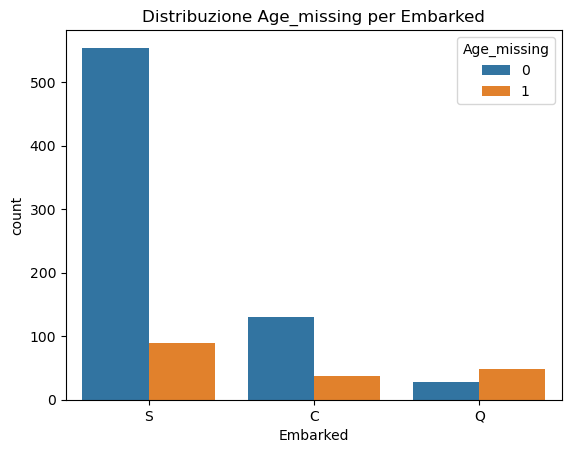

Percentuali:
 Age_missing     0     1
Pclass                 
1            86.1  13.9
2            94.0   6.0
3            72.3  27.7


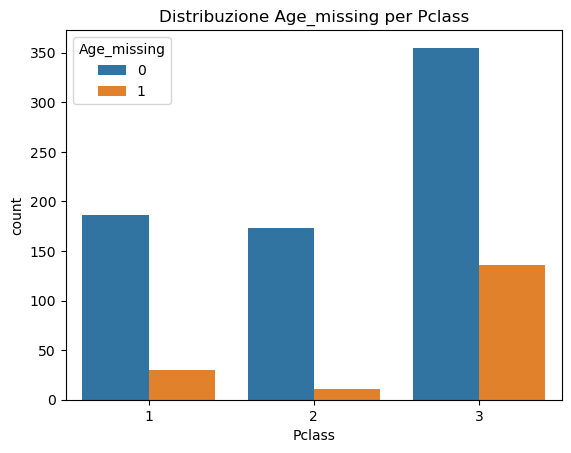

Percentuali:
 Age_missing     0     1
Sex                    
female       83.1  16.9
male         78.5  21.5


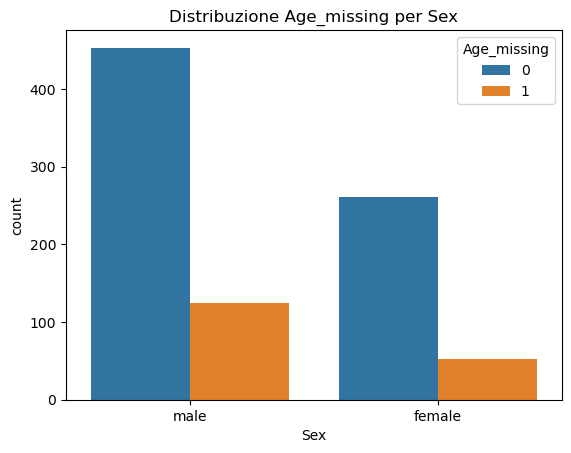

Percentuali:
 Age_missing     0     1
Survived               
0            59.4  70.6
1            40.6  29.4


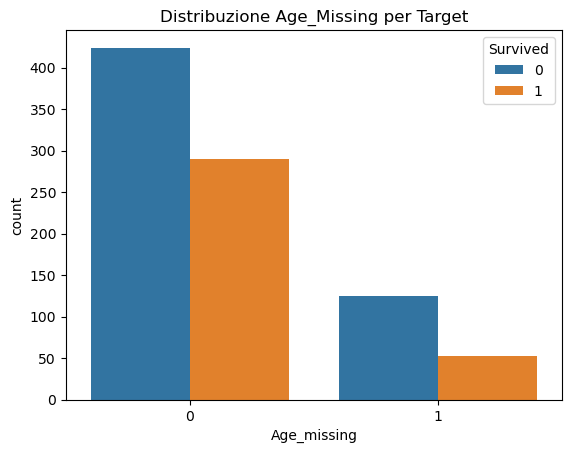

In [126]:
"""
Analisi distribuzioni dei valori mancanti di "Age"

Questo script:
1. Crea una colonna "Age_missing" dai dati mancanti di "Age"
2. Mostra le percentuali dei valori mancanti per ogni feature fino al target
3. Crea una crosstab dei valori mancanti per ogni feature fino al target

"""

# Colonna booleana: 1 se Age è mancante
data["Age_missing"] = data["Age"].isna().astype(int)

# Crosstab per Embarked
perc = pd.crosstab(data["Embarked"], data["Age_missing"], normalize="index") * 100
perc = perc.round(1)
print("Percentuali:\n", perc)

sns.countplot(x="Embarked", hue="Age_missing", data=data)
plt.title("Distribuzione Age_missing per Embarked")
plt.show()

# Crosstab per Pclass
perc1 = pd.crosstab(data["Pclass"], data["Age_missing"], normalize="index") * 100
perc1 = perc1.round(1)
print("Percentuali:\n", perc1)

sns.countplot(x="Pclass", hue="Age_missing", data=data)
plt.title("Distribuzione Age_missing per Pclass")
plt.show()

# Crosstab per Sex
perc2 = pd.crosstab(data["Sex"], data["Age_missing"], normalize="index") * 100
perc2 = perc2.round(1)
print("Percentuali:\n", perc2)

sns.countplot(x="Sex", hue="Age_missing", data=data)
plt.title("Distribuzione Age_missing per Sex")
plt.show()

# Crosstab per Target "Survived"
perc4 = pd.crosstab(data["Survived"], data["Age_missing"], normalize="columns") * 100
perc4 = perc4.round(1)
print("Percentuali:\n", perc4)

sns.countplot(x='Age_missing', hue='Survived', data=data)
plt.title("Distribuzione Age_Missing per Target")
plt.show()

Si può notare dall'ultimo grafico che non c'è correlazione diretta totale tra "Age_missing" e un valore di "Survived": vi sono passeggeri di cui non è stata registrata l'età anche trai sopravvissuti. Però la percentuale in rapporto tra deceduti e sopravvissuti è di maggiore deceduti per quelli che hanno l'età mancante, di circa l'11,2% in più. 

Per quanto riguarda l'imbarco, è rilevante notare come tra gli imbarcati a Queenstown in Irlanda (numero assoluto basso sul totale) quasi 2/3 non abbiano l'età registrata, mentre la percentuale dagli altri due imbarchi non è uguale ma simile, abbondantemente sotto il 50%.

Riguardo la classe di viaggio la terza classe spicca sulle altre con un 27% di passeggeri con età mancante, rispetto alle percentuali molto più esigue delle altre due classi, soprattutto la seconda.

Infine, tra uomini e donne la distribuzione è simile, leggermente più alta per gli uomini senza età specificata.

Sono morti 549 su 891
La percentuale di morti sul totale è: 61.62%


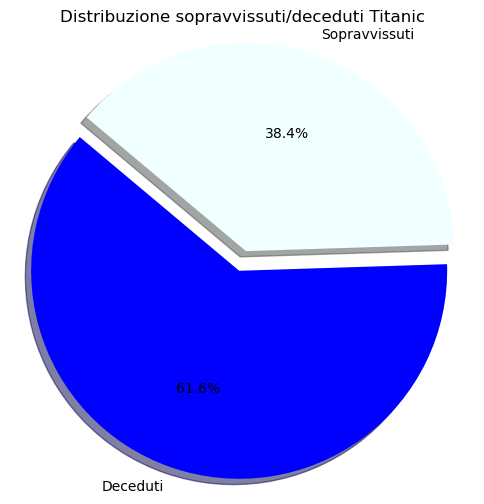

In [111]:

"""
Analisi della mortalità nel dataset Titanic.

Questo script esegue le seguenti operazioni:

1. Carica un sottoinsieme del dataset Titanic ('titanic_sub.csv').
2. Calcola:
   - il numero totale di passeggeri,
   - il numero di passeggeri deceduti (Survived == 0),
   - la percentuale di deceduti rispetto al totale.
3. Stampa i risultati in forma testuale.
4. Crea un grafico a torta per rappresentare visivamente la distribuzione tra
   sopravvissuti e deceduti:
   - I deceduti sono evidenziati con una fetta esplosa.
   - Le percentuali sono mostrate direttamente sulle fette.
   - Il grafico è in scala proporzionale (torta circolare).
"""
data = pd.read_csv("titanic_sub.csv")

totale_passeggeri = len(data["PassengerId"])
morti = data[(data["Survived"] == 0)]
totale_morti = len(morti)
percentuale = totale_morti / totale_passeggeri * 100

print(f"Sono morti {totale_morti} su {totale_passeggeri}")
print(f"La percentuale di morti sul totale è: {percentuale:.2f}%")

# Calcolo anche il numero dei sopravvissuti per il grafico
sopravvissuti = totale_passeggeri - totale_morti

labels = ["Deceduti", "Sopravvissuti"]
sizes = [totale_morti, sopravvissuti]
colors = ["blue", "azure"]
explode = (0.1, 0)  # per evidenziare la fetta dei deceduti

# Creazione del grafico
plt.figure(figsize=(6, 6))
plt.pie(
    sizes,
    explode=explode,
    labels=labels,
    colors=colors,
    autopct="%1.1f%%",
    shadow=True,
    startangle=140,
)
plt.title("Distribuzione sopravvissuti/deceduti Titanic")
plt.axis("equal")  # per rendere la torta circolare
plt.show()

Numero di Embarked S: 644
Numero di Embarked S morti: 427
Percentuale deceduti: 66.30%
Numero di Embarked S vivi: 217
Percentuale sopravvissuti: 33.70%

Numero di Embarked C: 168
Numero di Embarked C morti: 75
Percentuale deceduti: 44.64%
Numero di Embarked C vivi: 93
Percentuale sopravvissuti: 55.36%

Numero di Embarked Q: 77
Numero di Embarked Q morti: 47
Percentuale deceduti: 61.04%
Numero di Embarked Q vivi: 30
Percentuale sopravvissuti: 38.96%


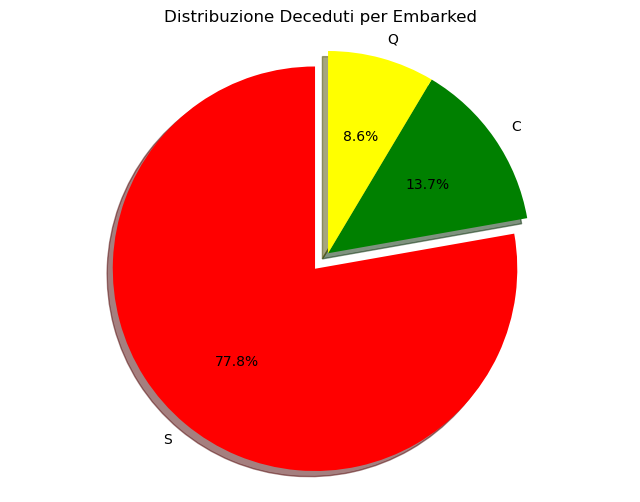

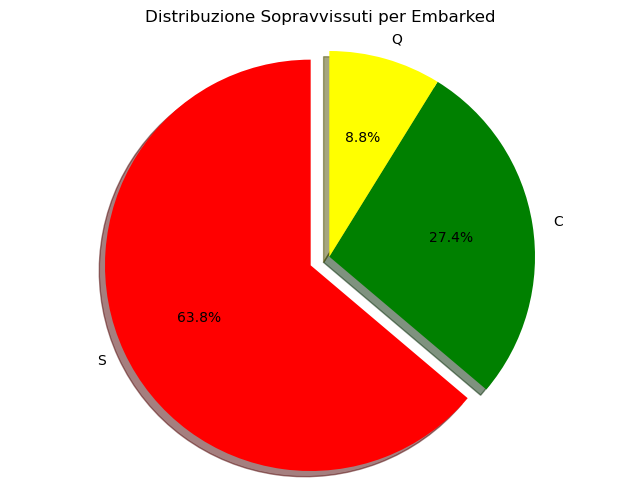

In [ ]:
def percentuale_deceduti(coloumn, item1, item2, item3=None):
    """
    Calcola e stampa il numero e la percentuale di passeggeri deceduti e passeggeri
    sopravvissuti per ciascuna delle categorie specificate in una colonna del dataset Titanic.

    Inoltre, visualizza due diagrammi a torta che rappresentano il numero di deceduti
    in ciascuna categoria rispetto al totale dei deceduti e il numero di sopravvissuti in
    ciascuna categoria rispetto al totale dei sopravvissuti.

    Parametri:
    - coloumn: str, il nome della colonna su cui effettuare il confronto (es. "Sex", "Pclass").
    - item1, item2, item3: valori da confrontare nella colonna specificata.
      item3 è opzionale: la funzione gestisce anche solo 2 categorie.

    Esempio di utilizzo:
    percentuale_deceduti("Sex", "male", "female")
    percentuale_deceduti("Pclass", 1, 2, 3)
    """
    cat1 = data[(data[coloumn] == item1)]
    cat2 = data[(data[coloumn] == item2)]
    cat3 = data[(data[coloumn] == item3)]
    cat1_morti = data[(data[coloumn] == item1) & (data["Survived"] == 0)]
    cat2_morti = data[(data[coloumn] == item2) & (data["Survived"] == 0)]
    cat3_morti = data[(data[coloumn] == item3) & (data["Survived"] == 0)]
    cat1_vivi = data[(data[coloumn] == item1) & (data["Survived"] == 1)]
    cat2_vivi = data[(data[coloumn] == item2) & (data["Survived"] == 1)]
    cat3_vivi = data[(data[coloumn] == item3) & (data["Survived"] == 1)]

    primacat = len(cat1)
    conteggioprima = len(cat1_morti)
    conteggioprima_vivi = len(cat1_vivi)
    percentuale1 = conteggioprima / primacat * 100
    percentuale1_vivi = conteggioprima_vivi / primacat * 100

    secondacat = len(cat2)
    conteggioseconda = len(cat2_morti)
    conteggioseconda_vivi = len(cat2_vivi)
    percentuale2 = conteggioseconda / secondacat * 100
    percentuale2_vivi = conteggioseconda_vivi / secondacat * 100

    terzacat = len(cat3)
    conteggioterza = len(cat3_morti)
    conteggioterza_vivi = len(cat3_vivi)
    if terzacat:
        percentuale3 = conteggioterza / terzacat * 100
        percentuale3_vivi = conteggioterza_vivi / terzacat * 100

    print(f"Numero di {coloumn} {item1}: {primacat}")
    print(f"Numero di {coloumn} {item1} morti: {conteggioprima}")
    print(f"Percentuale deceduti: {percentuale1:.2f}%")
    print(f"Numero di {coloumn} {item1} vivi: {conteggioprima_vivi}")
    print(f"Percentuale sopravvissuti: {percentuale1_vivi:.2f}%")

    print(f"\nNumero di {coloumn} {item2}: {secondacat}")
    print(f"Numero di {coloumn} {item2} morti: {conteggioseconda}")
    print(f"Percentuale deceduti: {percentuale2:.2f}%")
    print(f"Numero di {coloumn} {item2} vivi: {conteggioseconda_vivi}")
    print(f"Percentuale sopravvissuti: {percentuale2_vivi:.2f}%")

    if terzacat:
        print(f"\nNumero di {coloumn} {item3}: {terzacat}")
        print(f"Numero di {coloumn} {item3} morti: {conteggioterza}")
        print(f"Percentuale deceduti: {percentuale3:.2f}%")
        print(f"Numero di {coloumn} {item3} vivi: {conteggioterza_vivi}")
        print(f"Percentuale sopravvissuti: {percentuale3_vivi:.2f}%")

    # === GRAFICO A TORTA DECEDUTI===

    labels = [item1, item2]
    values = [conteggioprima, conteggioseconda]
    colors = ["red", "green", "yellow"]
    explode = [0.1, 0]  # evidenzia la prima fetta

    if item3 is not None:
        labels.append(item3)
        values.append(conteggioterza)
        explode.append(0)

    plt.figure(figsize=(8, 6))
    plt.pie(
        values,
        labels=labels,
        colors=colors,
        autopct="%1.1f%%",
        startangle=90,
        explode=explode,
        shadow=True,
    )
    plt.title(f"Distribuzione Deceduti per {coloumn}")
    plt.axis("equal")  # rende la torta perfettamente circolare
    plt.show()

    # === GRAFICO A TORTA SOPRAVVISSUTI===

    labels = [item1, item2]
    values = [conteggioprima_vivi, conteggioseconda_vivi]
    colors = ["red", "green", "yellow"]
    explode = [0.1, 0]  # evidenzia la prima fetta

    if item3 is not None:
        labels.append(item3)
        values.append(conteggioterza_vivi)
        explode.append(0)

    plt.figure(figsize=(8, 6))
    plt.pie(
        values,
        labels=labels,
        colors=colors,
        autopct="%1.1f%%",
        startangle=90,
        explode=explode,
        shadow=True,
    )
    plt.title(f"Distribuzione Sopravvissuti per {coloumn}")
    plt.axis("equal")  # rende la torta perfettamente circolare
    plt.show()


percentuale_deceduti("Embarked", "S", "C", "Q")

La percentuale di deceduti tra le persone imbarcate da Queenstown è alta, livemente sopra il 61%; ma questo numero corrisponde solo all'8,6% dei deceduti totali. 
I deceduti tra le persone imbarcate in Francia a Cherburg invece è inferiore alla metà, leggermente meno del 45%, ma rappresenta solo il 13,7% dei deceduti totali.
La quantità estremamente più alta di persone imbarcate a Southampthon porta il 66% ad incidere come 77.8% sul totale dei deceduti. 

Confronto con le percentuali dei sopravvissuti: può essere utile confrontare quanto incidono sul totale deceduti e sopravvissuti per categoria, in modo da notare una discriminante. In questo caso per quanto riguarda Cherburg si può notare una significativa differenza.

Il porto di imbarco quindi emerge come predittore indiretto delle possibilità di sopravvivenza, realisticamente per motivi socio-economici.

Numero di Pclass 1: 216
Numero di Pclass 1 morti: 80
Percentuale deceduti: 37.04%
Numero di Pclass 1 vivi: 136
Percentuale sopravvissuti: 62.96%

Numero di Pclass 2: 184
Numero di Pclass 2 morti: 97
Percentuale deceduti: 52.72%
Numero di Pclass 2 vivi: 87
Percentuale sopravvissuti: 47.28%

Numero di Pclass 3: 491
Numero di Pclass 3 morti: 372
Percentuale deceduti: 75.76%
Numero di Pclass 3 vivi: 119
Percentuale sopravvissuti: 24.24%


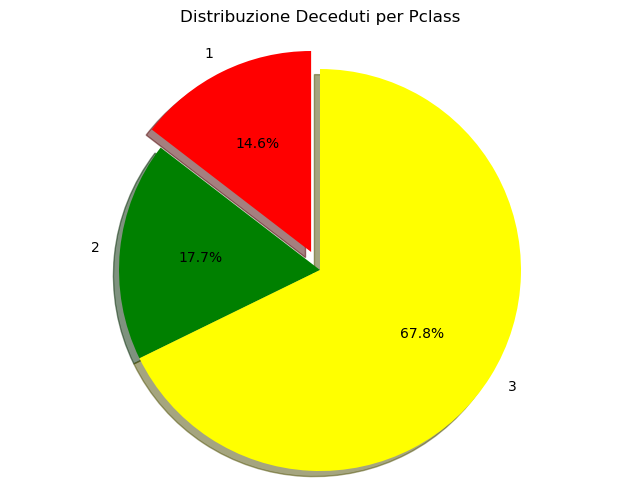

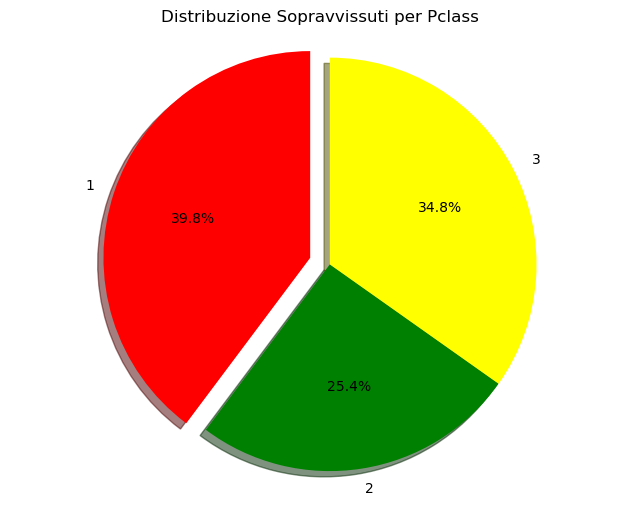

In [7]:
percentuale_deceduti("Pclass", 1, 2, 3)

La percentuale di deceduti tra le persone che viaggiavano in prima classe è discreta, livemente sopra il 37%; ma questo numero corrisponde solo all'14,6% dei deceduti totali. 
I deceduti tra le persone in seconda classe invece è leggermente superiore alla metà, quasi 53%, ma rappresenta solo il 17,7% dei deceduti totali.
La quantità di persone che viaggiavano in terza classe ha un'altissima percentuale di deceduti, quasi 76%, ma incide meno sul totale dei deceduti, il 67,8%. 

Per quanto riguarda il confronto con i sopravvissuti si nota nettamente la differenza sul totale di prima e seconda classe, che è nettissima. Nel totale dei sopravvissuti la prima classe occupa la maggioranza, nonostante in prima classe viaggiassero meno della metà delle persone della terza classe.

Lo status sociale, quindi soprattutto economico, è chiaramente un fattore fondamentale nella sopravvivenza a questa tragedia.

Numero di Sex male: 577
Numero di Sex male morti: 468
Percentuale deceduti: 81.11%
Numero di Sex male vivi: 109
Percentuale sopravvissuti: 18.89%

Numero di Sex female: 314
Numero di Sex female morti: 81
Percentuale deceduti: 25.80%
Numero di Sex female vivi: 233
Percentuale sopravvissuti: 74.20%


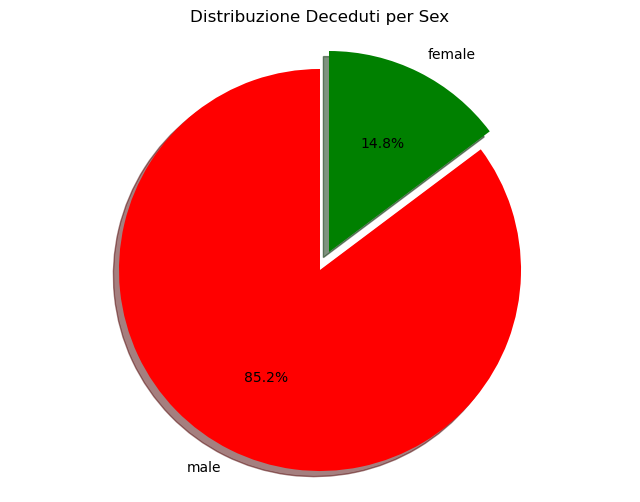

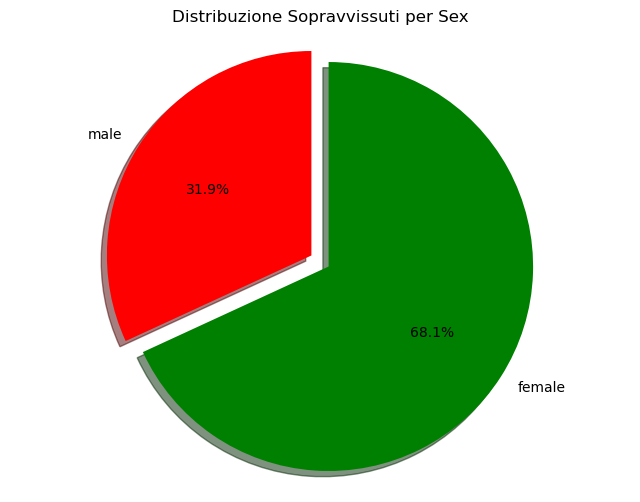

In [8]:
percentuale_deceduti("Sex", "male", "female")

La quantità di uomini a bordo è maggiore delle donne e la percentuale di 81% pesa l'85% sul totale.
Al contrario il 25% delle donne decedute incide meno sul totale, il restante (quasi) 15%.

C:\Users\pc\AppData\Local\Temp\ipykernel_14120\4120938117.py:23: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = data.groupby("Fascia_Età").agg(


   Fascia_Età  Totale_Passeggeri  Totale_Deceduti  Percentuale_Decessi
0         0-5                 40               13            32.500000
1        5-10                 22               11            50.000000
2       10-15                 16                9            56.250000
3       15-20                 86               52            60.465116
4       20-25                114               75            65.789474
5       25-30                106               68            64.150943
6       30-35                 95               55            57.894737
7       35-40                 72               39            54.166667
8       40-45                 48               30            62.500000
9       45-50                 41               25            60.975610
10      50-55                 32               18            56.250000
11      55-60                 16               10            62.500000
12      60-65                 15                9            60.000000
13    

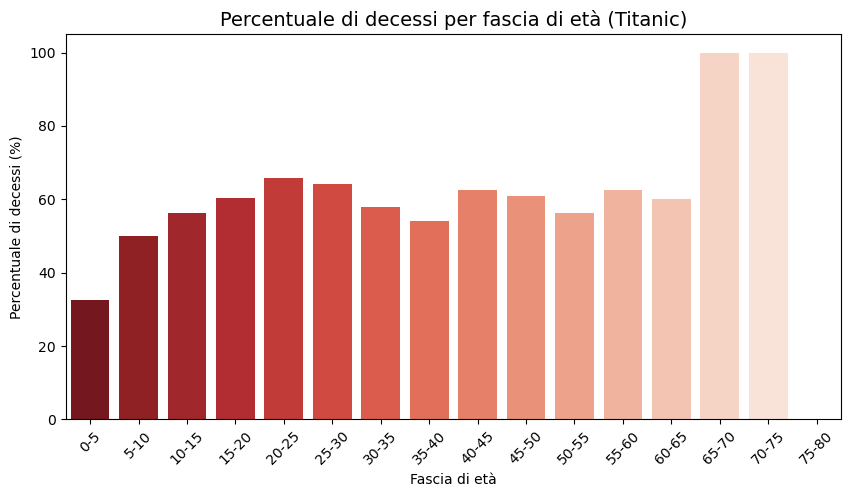

In [ ]:
"""
Analisi della percentuale di decessi per fasce di età (ampiezza: 5 anni).

Questo script:
1. Carica il dataset Titanic.
2. Raggruppa i passeggeri in fasce di età di 5 anni (0-5, 5-10, ..., 75-80).
3. Per ogni fascia calcola:
   - Totale passeggeri
   - Totale deceduti
   - Percentuale di decessi
4. Visualizza una tabella riepilogativa.
5. Mostra un grafico a barre delle percentuali di decessi per fascia.
"""

# Rimuove righe senza età
data = data.dropna(subset=["Age"])

# Crea fasce di età di 5 anni
bins = range(0, 85, 5)  # da 0 a 80 anni
labels = [f"{i}-{i+5}" for i in bins[:-1]]
data["Fascia_Età"] = pd.cut(data["Age"], bins=bins, labels=labels, right=False)

# Raggruppa per fascia di età
grouped = (
    data.groupby("Fascia_Età")
    .agg(
        Totale_Passeggeri=("PassengerId", "count"),
        Totale_Deceduti=("Survived", lambda x: (x == 0).sum()),
    )
    .reset_index()
)

# Calcola la percentuale di decessi
grouped["Percentuale_Decessi"] = (
    grouped["Totale_Deceduti"] / grouped["Totale_Passeggeri"]
) * 100

# Mostra la tabella
print(grouped)

# Grafico
plt.figure(figsize=(10, 5))
sns.barplot(
    data=grouped,
    x="Fascia_Età",
    hue="Fascia_Età",
    y="Percentuale_Decessi",
    legend=False,
    palette="Reds_r",
)
plt.title("Percentuale di decessi per fascia di età (Titanic)", fontsize=14)
plt.xlabel("Fascia di età")
plt.ylabel("Percentuale di decessi (%)")
plt.xticks(rotation=45)
plt.savefig("fasce_età_decessi_grafico.png", dpi=300)
plt.show()

Appare chiaro da questo schema che tra i 5 e i 65 anni l'età incide davvero poco sul decesso, in quanto tutti i cluster sono tra il 50% e il 65% di decessi non proseguendo in maniera progressiva con l'avanzare dell'età, ma con "sali e scendi". La percentuale di decessi è molto più bassa, su 40 passeggeri, dei bambini sotto a 5 anni. Il campione rende la percentuale attendibile, immaginando come sia stata data priorità a bambini e donne all'interno delle scialuppe. 
Il 100% di decesso per gli individui sopra i 65 anni potrebbe far considerare questi cluster outliers, dato il campione ridotto (10 individui totali) e l'imprevedibilità dei fattori che contribuiscono a questo esito. Non è però, considerato il contesto, totalmente inattendibile questa percentuale, perchè le difficoltà di una persona anziana in una situazione di catastrofe sono oggettive e prevedibili. 

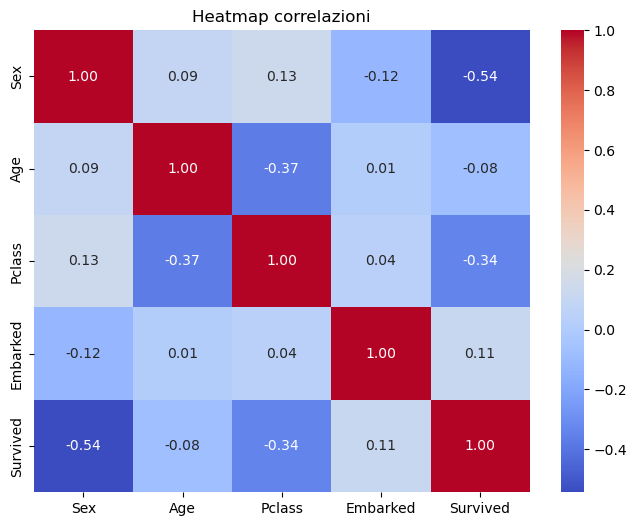

In [41]:
"""
Analizza la correlazione tra la variabile 'Survived' e alcune variabili selezionate del dataset Titanic
(Age, Sex, Pclass, Embarked) e visualizza i risultati in una heatmap.

Passaggi eseguiti:
1. Conversione delle variabili categoriche 'Sex' e 'Embarked' in valori numerici.
2. Selezione di un sottoinsieme di colonne rilevanti per l'analisi: Survived, Age, Sex, Pclass, Embarked.
3. Calcolo della matrice di correlazione utilizzando il coefficiente di Pearson.
4. Visualizzazione di una heatmap con i valori di correlazione.

Note:
- I valori di correlazione variano tra -1 e 1.
  • Valori vicini a 1: forte correlazione positiva.
  • Valori vicini a -1: forte correlazione negativa.
  • Valori vicini a 0: assenza di correlazione lineare.
- La mappatura numerica di 'Sex' e 'Embarked' è arbitraria, ma necessaria per calcolare la correlazione.
"""

# Converte variabili categoriche in numeriche
data_encoded = data.copy()
data_encoded["Sex"] = data_encoded["Sex"].map({"male": 1, "female": 0})
data_encoded["Embarked"] = data_encoded["Embarked"].map({"S": 0, "C": 1, "Q": 2})

# Seleziona solo le colonne desiderate
subset = data_encoded[["Sex", "Age", "Pclass", "Embarked", "Survived"]]

# Calcola la correlazione
corr = subset.corr(method="pearson")

# Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Heatmap correlazioni")
plt.show()

Questa heatmap evidenzia, come era già chiaro a primo impatto tra i dati, la corposa correlazione che c'è tra il genere e la sopravvivenza. Inoltre evidenzia anche la discreta correlazione che vi è tra:
- classe di viaggio e sopravvivenza
- classe di viaggio ed età dei passeggeri: è estremamente verosimile che le persone più giovani fossero meno ricche quindi l'età media sia più alta   nelle prime classi.

Queste due evidenze bilanciano la corrispondenza tra il fattore età e la sopravvivenza.

CONCLUSIONI DELL'ANALISI ESPLORATIVA SUL TITANIC

Ad oltre il 19% dei passeggeri nel dataset non è stata registrata l'età:
- Questi non corrispondono interamente ad un valore di "survived" (si poteva ipotizzare 0, quindi "morti"), ma fra di loro vi è circa l'11% di     decessi in più rispetto ai passeggeri con età registrata;
- Le persone imbarcate a Queenstown, in Irlanda, l’ultima tappa, sono poche sul totale, ma circa i 2/3 (63,6%) di loro non hanno età registrata. Una proporzione elevatissima, anche se il numero assoluto è più basso rispetto alle età non registrate dei passeggeri partiti da Southampthon, che però sul totale della categoria pesano solo il 14%, essendo tantissime le persone imbarcate dalla città inglese, la partenza effettiva del viaggio.
- Rilevante anche il fatto che la percentuale delle età mancanti sui passeggeri in terza classe è la più alta, 27% rispetto al 14% di prima e al 6% di seconda. Il genere invece è praticamente analogo.

Nel database vi è oltre il 61% di decessi. Le feature che influiscono maggiormente sono:
- GENERE: si nota immediatamente dal grafico dedicato e dalla heatmap (correlazione 0.54) come il genere sia la variabile più influente. C'è un divario enorme tra decessi maschili (81%) e femminili (25%).
- CLASSE DI VIAGGIO: emerge un chiaro gradiente sociale. Più si sale di classe e più la percentuale di decessi è alta. 37% di decessi in prima, circa 53% in seconda, oltre 75% in terza. Plausibile una vera e propria disparità all'accesso dei mezzi di salvataggio.
- PORTO DI IMBARCO: l'aspetto geografico oppure di tempistiche di imbarco sembra contare poichè la percentuale di decessi dei passeggeri saliti a Cherbourg è nettamente inferiore alle altre (circa 45%). Ma questo dato può anche essere un riflesso indiretto dello status socio-economico dei passeggeri. è una variabile categorica di supporto.
- ETÀ: dalla heatmap si vede come la correlazione è veramente debole (-0,08), e dai grafici si nota come nei decessi l'età incida solo agli estremi, con una sopravvivenza molto alta sotto i 5 anni e un inevitabile decesso sopra ai 65 anni. All'interno di queste due fasce d'età vi è la stragrande maggiornaza dei passeggeri, e la divisione in cluster non ha evidenziato significative differenze tra loro.


2. SUDDIVISIONE DEL DATASET

In [127]:
# stabilisco feature e target
features = data[["Sex", "Age", "Pclass", "Embarked"]]
target = data["Survived"]

# stampo dimensione 
print(features.shape)
print(target.shape)

(891, 4)
(891,)


In [128]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.25, random_state=0)

print("Dimensioni di X_train: ", X_train.shape)
print("Dimensioni di X_test: ", X_test.shape)
print("Dimensioni di y_train: ", y_train.shape)
print("Dimensioni di y_test: ", y_test.shape)

Dimensioni di X_train:  (668, 4)
Dimensioni di X_test:  (223, 4)
Dimensioni di y_train:  (668,)
Dimensioni di y_test:  (223,)


In [129]:
# Seconda divisione del trainig set, suddiviso in train e validation
X_train_new, X_val, y_train_new, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=0)

print("Dimensioni di X_train_new: ", X_train_new.shape)
print("Dimensioni di X_val: ", X_val.shape)
print("Dimensioni di y_train_new: ", y_train_new.shape)
print("Dimensioni di y_val: ", y_val.shape)

Dimensioni di X_train_new:  (501, 4)
Dimensioni di X_val:  (167, 4)
Dimensioni di y_train_new:  (501,)
Dimensioni di y_val:  (167,)


3. GESTIONE DEI VALORI MANCANTI NELLA FEATURE "AGE"

Per comprendere l’impatto delle diverse modalità di trattamento dei valori mancanti sulla qualità delle previsioni, è stata realizzata un’analisi comparativa che mette a confronto più strategie di imputazione:

- Rimozione dei record incompleti: in questo caso le osservazioni prive di informazione sull’età vengono eliminate dal dataset. La procedura è immediata ma riduce sensibilmente la numerosità del campione disponibile per l’analisi, con potenziale perdita di informazioni utili;

- Sostituzione con la media globale: i valori mancanti vengono rimpiazzati con la media dell’età calcolata su tutta la colonna. È una soluzione semplice ed efficiente dal punto di vista computazionale, che preserva il numero di osservazioni, ma rischia di appiattire la distribuzione e di non riflettere differenze strutturali presenti nei dati;

- Imputazione tramite mediana: in alternativa alla media, si utilizza la mediana della distribuzione come valore sostitutivo. Questo approccio è più robusto in presenza di outlier e mantiene una rappresentazione più fedele delle età centrali;

- Sostituzione dei valori nulli con un valore "standard" (-1) che si discosti da un'età vera faccia comprendere che il record in questione fosse inizialmente sprovvisto dell'età del passeggero.

Per ogni strategia è stato scelto il modello della Logistic Regression, modello di classificazione lineare molto veloce e stabile che lo rende una buona baseline.

1. Rimozione

In [130]:
# Creo una copia del dataframe
data_drop = data.copy()

# Rimuovo i valori mancanti nella colonna "Age"
data_drop.dropna(subset=["Age"], inplace=True)

print(data_drop.shape)

(714, 7)


In [131]:
# Definizione feature e target
X1 = data_drop[["Age", "Sex", "Pclass", "Embarked"]].copy()
y1 = data_drop["Survived"]

# Encoding delle colonne categoriche
X1 = pd.get_dummies(X1, columns=["Sex", "Embarked", "Pclass"], drop_first=True, dtype=int)

# Split train/test
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.25, random_state=0)

model = LogisticRegression(max_iter=1000)
model.fit(X_train1, y_train1)
acc_drop = accuracy_score(y_test1, model.predict(X_test1))
acc_drop = round(acc_drop, 4)
results["Drop"] = acc_drop

print("Accuratezza sul test finale rimuovendo i valori nulli:", results["Drop"])

Accuratezza sul test finale rimuovendo i valori nulli: 0.7933


2. Media

In [132]:
# Creo una copia del dataframe
data_mean = data.copy()

# Cerco la media dell'età
mean_age = data_mean["Age"].mean()

# I valori nulli vengono sostituiti con la media
data_mean["Age"] = data_mean["Age"].fillna(mean_age)

print(data_mean.shape)
print(data_mean["Age"].isnull().sum())


(891, 7)
0


In [133]:
# Definizione feature e target
X2 = data_mean[["Age", "Sex", "Pclass", "Embarked"]].copy()
y2 = data_mean["Survived"]

# Encoding delle colonne categoriche
X2 = pd.get_dummies(X2, columns=["Sex", "Embarked", "Pclass"], drop_first=True, dtype=int)

# Split train/test
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.25, random_state=0)

model = LogisticRegression(max_iter=1000)
model.fit(X_train2, y_train2)
acc_mean = accuracy_score(y_test2, model.predict(X_test2))
acc_mean = round(acc_mean, 4)
results["Mean"] = acc_mean

print("Accuratezza sul test finale imputando con la media:", results["Mean"])

Accuratezza sul test finale imputando con la media: 0.7937


3. Mediana

In [134]:
# Creo una copia del dataframe
data_median = data.copy()

# Cerco la media dell'età
median_age = data_mean["Age"].median()

# I valori nulli vengono sostituiti con la media
data_median["Age"] = data_median["Age"].fillna(median_age)

print(data_median.shape)
print(data_median["Age"].isnull().sum())

(891, 7)
0


In [135]:
# Definizione feature e target
X3 = data_median[["Age", "Sex", "Pclass", "Embarked"]].copy()
y3 = data_median["Survived"]

# Encoding delle colonne categoriche
X3 = pd.get_dummies(X3, columns=["Sex", "Embarked", "Pclass"], drop_first=True, dtype=int)

# Split train/test
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size=0.25, random_state=0)

model = LogisticRegression(max_iter=1000)
model.fit(X_train3, y_train3)
acc_median = accuracy_score(y_test3, model.predict(X_test3))
acc_median = round(acc_drop, 4)
results["Median"] = acc_median

print("Accuratezza sul test finale imputando con la mediana:", results["Median"])

Accuratezza sul test finale imputando con la mediana: 0.7933


4. Numero arbitrario

In [136]:
# Creo una copia del dataframe
data_cost = data.copy()

# I valori nulli vengono sostituiti con la media
data_cost["Age"] = data_cost["Age"].fillna(-1)

print(data_cost.shape)
print(data_cost["Age"].isnull().sum())

(891, 7)
0


In [137]:
# Definizione feature e target
X4 = data_median[["Age", "Sex", "Pclass", "Embarked"]].copy()
y4 = data_median["Survived"]

# Encoding delle colonne categoriche
X4 = pd.get_dummies(X4, columns=["Sex", "Embarked", "Pclass"], drop_first=True, dtype=int)

# Split train/test
X_train4, X_test4, y_train4, y_test4 = train_test_split(X4, y4, test_size=0.25, random_state=0)

model = LogisticRegression(max_iter=1000)
model.fit(X_train4, y_train4)
acc_cost = accuracy_score(y_test4, model.predict(X_test3))
acc_cost = round(acc_drop, 4)
results["Const -1"] = acc_cost

print("Accuratezza sul test finale imputando con un valore arbitrario:", results["Const -1"])

Accuratezza sul test finale imputando con un valore arbitrario: 0.7933


Sintesi dei test e accuratezze:


In [86]:
print("Accuratezza strategie di imputazione:")
for k,v in results.items():
    print(f"{k}: {v:.3f}")

Accuratezza strategie di imputazione:
Drop: 0.793
Mean: 0.794
Median: 0.793
Const -1: 0.793


Le performance si mostrano sostanzialmente uguali con questo modello, con solo la media che spicca lievemente sulle altre.
Viene scelta la media quindi anche perchè mantiene una maggiore coerenza con la struttura dati.

4. SOSTITUZIONE VALORI MANCANTI

Nella colonna "Embarked ci sono due valori mancanti: questi due record verranno riempiti con la moda del training set.
I dati mancanti di "Age" invece verranno riempiti con l'età media.

In [138]:
# Calcola la moda di 'Embarked' su X_train_new
moda_embarked_X_train_new = X_train_new["Embarked"].mode()[0]
print("Moda colonna 'Embarked' su X_train_new: ", moda_embarked_X_train_new)

# Imputazione su tutti i DataFrame
for df in [X_train_new, X_val, X_test]:
    df["Embarked"] = df["Embarked"].fillna(moda_embarked_X_train_new)

print("Valori mancanti in embarked :")
print(X_train_new['Embarked'].isnull().sum())
print(X_val['Embarked'].isnull().sum())
print(X_test['Embarked'].isnull().sum())

Moda colonna 'Embarked' su X_train_new:  S
Valori mancanti in embarked :
0
0
0


In [139]:
print("Dimensioni di X_train_new: ", X_train_new.shape)
print("Dimensioni di X_val: ", X_val.shape)
print("Dimensioni di X_test: ", X_test.shape)

Dimensioni di X_train_new:  (501, 4)
Dimensioni di X_val:  (167, 4)
Dimensioni di X_test:  (223, 4)


In [141]:
from sklearn.impute import SimpleImputer

# Controllo valori mancanti PRIMA
print("Valori mancanti in 'Age' PRIMA dell'imputazione:")
print("Train:", X_train_new["Age"].isnull().sum())
print("Val  :", X_val["Age"].isnull().sum())
print("Test :", X_test["Age"].isnull().sum())

# Inizializzo l'imputer con la strategia della media
imputer = SimpleImputer(strategy="mean")

# Fit SOLO sul training set
X_train_new.loc[:, "Age"] = imputer.fit_transform(X_train_new[["Age"]])

# Trasformo validation e test con la media calcolata sul training
X_val.loc[:, "Age"] = imputer.transform(X_val[["Age"]])
X_test.loc[:, "Age"] = imputer.transform(X_test[["Age"]])

# Stampo l'età media usata per l'imputazione
print("\nEtà media (calcolata sul train):", imputer.statistics_[0])

# Controllo valori mancanti
print("\nValori mancanti in 'Age' dopo l'imputazione:")
print("Train:", X_train_new["Age"].isnull().sum())
print("Val  :", X_val["Age"].isnull().sum())
print("Test :", X_test["Age"].isnull().sum())

Valori mancanti in 'Age' PRIMA dell'imputazione:
Train: 102
Val  : 31
Test : 44

Età media (calcolata sul train): 29.958646616541355

Valori mancanti in 'Age' dopo l'imputazione:
Train: 0
Val  : 0
Test : 0


5. CODIFICA VARIABILI CATEGORICHE CON ONE-HOT

In [142]:
from sklearn.preprocessing import OneHotEncoder
"""
Questo script applica la codifica One-Hot alle variabili categoriche del dataset
(train, validation, test) utilizzando scikit-learn.

Funzionalità principali:
1. Identifica le colonne categoriche da trasformare ('Sex', 'Embarked', 'Pclass').
2. Inizializza un OneHotEncoder con:
   - handle_unknown='ignore' per gestire categorie nuove in val/test.
   - sparse_output=False per ottenere array densi.
3. Esegue il fit dell'encoder solo sul training set (per evitare data leakage),
   quindi applica la trasformazione coerente su train, validation e test.
4. Crea DataFrame con le nuove feature codificate e sostituisce le colonne
   categoriche originali.
5. Mostra controlli finali con:
   - prime righe del training set codificato.
   - informazioni sui DataFrame codificati (numero colonne, tipi, valori non nulli).

Output:
- X_train_new: DataFrame di training codificato con feature numeriche e dummy variables.
- X_val: DataFrame di validation codificato.
- X_test: DataFrame di test codificato.
- Stampa di anteprime e informazioni per verificare la corretta trasformazione.
"""

# Colonne categoriche da codificare
colonne_cate = ['Sex', 'Embarked', 'Pclass']

# Inizializzazione del OneHotEncoder
one_hot = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

# Fit sul training set e trasformazione di train, validation e test
X_train_encoded = pd.DataFrame(
    one_hot.fit_transform(X_train_new[colonne_cate]),
    columns=one_hot.get_feature_names_out(colonne_cate),
    index=X_train_new.index
)
X_val_encoded = pd.DataFrame(
    one_hot.transform(X_val[colonne_cate]),
    columns=one_hot.get_feature_names_out(colonne_cate),
    index=X_val.index
)
X_test_encoded = pd.DataFrame(
    one_hot.transform(X_test[colonne_cate]),
    columns=one_hot.get_feature_names_out(colonne_cate),
    index=X_test.index
)

# Rimozione colonne originali e concatenazione
X_train_new = pd.concat([X_train_new.drop(columns=colonne_cate), X_train_encoded], axis=1)
X_val = pd.concat([X_val.drop(columns=colonne_cate), X_val_encoded], axis=1)
X_test = pd.concat([X_test.drop(columns=colonne_cate), X_test_encoded], axis=1)

# Controllo finale
print("Prime 5 righe del training set codificato:")
print(X_train_new.head())

# Visualizzazione delle informazioni sul DataFrame delle feature di training codificate
print("\nInformazioni su X_train_new dopo la codifica One-Hot:")
X_train_new.info()

# Aggounta di un controllo per X_val e X_test 
print("\nPrime 5 righe di X_val dopo la codifica One-Hot:")
print(X_val.head())
print("\nInformazioni su X_val dopo la codifica One-Hot:")
X_val.info()

Prime 5 righe del training set codificato:
           Age  Sex_female  Sex_male  Embarked_C  Embarked_Q  Embarked_S  \
424  18.000000         0.0       1.0         0.0         0.0         1.0   
812  35.000000         0.0       1.0         0.0         0.0         1.0   
26   29.958647         0.0       1.0         1.0         0.0         0.0   
831   0.830000         0.0       1.0         0.0         0.0         1.0   
415  29.958647         1.0       0.0         0.0         0.0         1.0   

     Pclass_1  Pclass_2  Pclass_3  
424       0.0       0.0       1.0  
812       0.0       1.0       0.0  
26        0.0       0.0       1.0  
831       0.0       1.0       0.0  
415       0.0       0.0       1.0  

Informazioni su X_train_new dopo la codifica One-Hot:
<class 'pandas.core.frame.DataFrame'>
Index: 501 entries, 424 to 606
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Age         501 non-null    float64
 1   

6. IMPLEMENTAZIONE DEL DECISION TREE CLASSIFIER

In questa fase bisogna determinare la profondità ottimale per un modello di albero di decisione, e successivamente valutare le prestazioni del modello selezionato su un set di dati non visto.

In [147]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

"""
Questo script esegue la ricerca della profondità ottimale per un albero di decisione
sul dataset Titanic (o simile) utilizzando un approccio con set di training, validation e test.

Flusso operativo:
1. Definisce una lista di valori di profondità massima da testare per l'albero decisionale.
   Le feature sono poche e realisticamente non è necessario andare troppo in profondità, perchè il rischio di overfitting
   è molto alto. Può essere utile provare delle pronfondità basse, una intermedia, una profonda e quella massima per calcolare
   le varie accuratezze del modello. 
2. Per ogni profondità:
   - Allena un DecisionTreeClassifier sul training set.
   - Valuta le prestazioni sul validation set.
   - Registra l'accuratezza ottenuta.
3. Seleziona la profondità che massimizza l'accuratezza sul validation set.
4. Ricostruisce il training set unendo training e validation.
5. Addestra un modello finale con la profondità ottimale trovata.
6. Valuta il modello finale sul test set indipendente e stampa l'accuratezza.

Output:
- Accuratezze sul validation set per ciascun valore di profondità testato.
- Profondità ottimale selezionata.
- Accuratezza finale sul test set.
"""
# Profondità da testare
depths_to_try = [2, 5, 10, 25, None]
val_accuracies = {}

# Si itera sulle diverse profondità
for depth in depths_to_try:
    clf = DecisionTreeClassifier(max_depth=depth, random_state=0)
    clf.fit(X_train_new, y_train_new)           # Train on training set
    y_val_pred = clf.predict(X_val)            # Predict on validation set
    val_accuracies[depth] = accuracy_score(y_val, y_val_pred)

# Migliore profondità
best_depth = max(val_accuracies, key=val_accuracies.get)
print("\nValidation accuracies for different depths:")
for d, acc in val_accuracies.items():
    print(f"  max_depth={d}: {acc:.4f}")
print(f"\nMigliore profondità dell'albero: {best_depth} con accuratezza {val_accuracies[best_depth]:.4f}")

# Addestramwento su X_train_new concatenato con validation
X_train_full = pd.concat([X_train_new, X_val], ignore_index=False)
y_train_full = pd.concat([y_train_new, y_val], ignore_index=False)

final_model = DecisionTreeClassifier(max_depth=best_depth, random_state=0)
final_model.fit(X_train_full, y_train_full)

# Previsioni sul test set
y_test_pred = final_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"\nAccuratezza del modello finale sul test set: {test_accuracy:.4f}")



Validation accuracies for different depths:
  max_depth=2: 0.7904
  max_depth=5: 0.8024
  max_depth=10: 0.8144
  max_depth=25: 0.7964
  max_depth=None: 0.7964

Migliore profondità dell'albero: 10 con accuratezza 0.8144

Accuratezza del modello finale sul test set: 0.7892


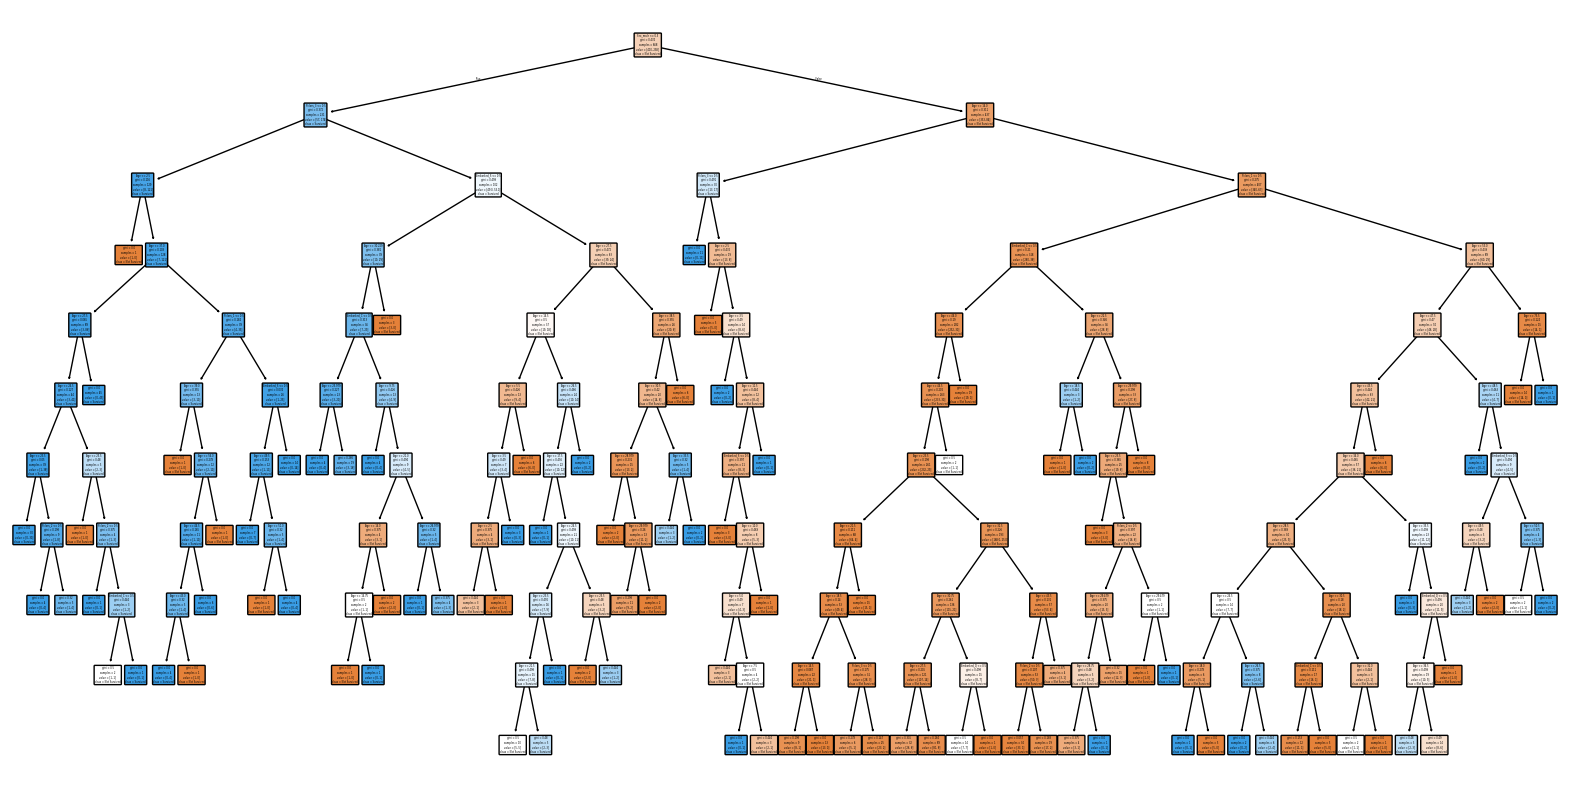

In [149]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

"""
Visualizzazione e salvataggio dell'albero decisionale addestrato.

Questo script genera una rappresentazione visiva dell'albero decisionale 
finale (final_model), utilizzando le funzioni di matplotlib e sklearn. 
L'albero viene mostrato a schermo con colori che evidenziano le classi 
previste e salvato in un file PNG ad alta risoluzione ('albero_titanic.png').

- Larghezza e altezza della figura sono impostate per facilitare la leggibilità.
- Le feature e le classi sono etichettate nel grafico.
- Il file immagine viene salvato nella directory corrente.
"""

# Crea la figura e l'oggetto assi
fig = plt.figure(figsize=(20, 10))

# Disegna l'albero
plot_tree(
    final_model,
    feature_names=X_train_full.columns,
    class_names=["Not Survived", "Survived"],
    filled=True,
    rounded=True,
)

plt.show()

# Salva la figura
fig.savefig("albero_titanic.png", dpi=300, bbox_inches="tight")

plt.close(fig)

CONLUSIONE

La selezione della profondità ottimale tramite validation set ha permesso di bilanciare bias e varianza, evitando l'overfitting. L'accuratezza finale sul test set (0,7892) mostra che l'albero di decisione configurato a con max_depth=10 generalizza discretamente bene a dati nuovi, rendendolo un modello affidabile per predire la sopravvivenza dei passeggeri del titanic.